### I - DEFINITION DES CHEMINS RELATIFS (INPUTS AND OUTPUTS)

In [1]:
import matplotlib as plt
import cv2
import os
import pandas as pd
import seaborn as sns

current_directory = os.getcwd()

# Obtenir le chemin du dossier parent en naviguant deux fois vers le haut
parent_folder = os.path.dirname(current_directory)
output_folder = os.path.normpath(os.path.join(parent_folder, 'data'))
print(parent_folder)
print(output_folder)


d:\DATA\a.asri\doc-classifier
d:\DATA\a.asri\doc-classifier\data


### II - IMPORT DES FONCTIONS (A DEPLACER DANS SRC ULTERIEUREMENT)

In [2]:
import cv2
import os


def bluriness(img_path):
    """
    Calcule la netteté de l'image en utilisant la variance du Laplacien.

    Args:
        img_path (str): Le chemin de l'image.

    Returns:
        float: La variance du Laplacien, qui indique la netteté de l'image.
    """
    # Vérifier si le chemin de l'image est valide
    if not os.path.exists(img_path):
        raise ValueError("Le chemin de l'image fourni n'existe pas.")
    
    # Lire l'image en niveaux de gris
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Vérifier si l'image est valide
    if img is None:
        raise ValueError("Impossible de lire l'image. Vérifiez le chemin de l'image.")
    
    # Calculer le Laplacien
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    
    # Calculer la variance du Laplacien
    bluriness_var = laplacian.var()
    
    return bluriness_var


def gp_name(file_path):
    """
    Obtient le nom du dossier grand-parent du chemin du fichier.

    Args:
        file_path (str): Le chemin du fichier.

    Returns:
        str: Le nom du dossier grand-parent.
    """
    # Vérifier si le chemin du fichier est valide
    if not os.path.exists(file_path):
        raise ValueError("Le chemin du fichier fourni n'existe pas.")
    
    # Obtenir le dossier parent du fichier
    parent_folder = os.path.dirname(file_path)
    
    # Obtenir le dossier parent du dossier parent
    grandparent_folder = os.path.dirname(parent_folder)
    
    # Extraire le nom du dossier grand-parent
    grandparent_directory_name = os.path.basename(grandparent_folder)
    
    return grandparent_directory_name


### III - EXTRACTION DES INFORMATIONS - (LIRE COMMENTAIRE CI-DESSOUS)

In [3]:
""" ATTENTION : Cette case permet de générer un fichier "img_info.csv" contenant les informations sur les images. Son temps d'execution est estimé à 5min
Le fichier généré contiendra des informations sur les photos (dimension, flous, colorspace, ... etc), mais ne sera utilisé qu'une seule fois.

Le dataframe "image_info" sera crée à la base de ce fichier, et contiendra les labels issus des résultats de l'exploration des images.
"""


import matplotlib as plt
import cv2
import os
import pandas as pd


# Définition des chemins de dossiers
folder_paths = []

# Boucle pour créer les chemins de dossiers en fonction de la structure spécifiée
for i in [1, 2, 3, 4]:  
    folder_path = os.path.join(parent_folder, 'data', 'raw', f'data_0{i}', 'images')
    folder_paths.append(folder_path)

def extract_image_info(folder_paths):
    # Création d'une liste pour stocker les informations des images
    image_info_list = []

    # Liste des extensions d'images supportées
    supported_extensions = ['.png', '.jpg', '.jpeg', '.tif', 'jpeg', 'raw', 'psd', 'svg', 'bmp']

    # Parcourir les dossiers contenant les images
    for folder_path in folder_paths:
        # Parcourir les fichiers dans le dossier
        for filename in os.listdir(folder_path):
            # Vérifier s'il s'agit d'un fichier image
            if any(filename.lower().endswith(ext) for ext in supported_extensions):
                # Chemin complet de l'image
                image_path = os.path.join(folder_path, filename)
                
                # Charger l'image avec OpenCV
                image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
                
                if image is not None:
                    # Récupérer les dimensions de l'image (condition à rajouter sur les dimensions)
                    height, width = image.shape[:2]  # Récupérer uniquement la hauteur et la largeur
                    channels = image.shape[2] if len(image.shape) == 3 else 1  # Nombre de canaux (ou 1 s'il s'agit d'une image en niveaux de gris
                    colorspace = 'rgb' if channels == 3 else ('gray' if channels == 1 else 'binary') 
                    extension = filename.split('.')[-1]
                    bluriness_value = bluriness(image_path)
                    dataset = gp_name(image_path)  # Appeler la fonction gp_name pour obtenir le nom du jeu de données
                
                    # Ajouter les informations à la liste
                image_info_list.append([filename, extension, colorspace, height, width, bluriness_value, image_path, dataset])

    # Création d'un DataFrame à partir de la liste des informations
    image_info_df = pd.DataFrame(image_info_list, columns=['image_name', 'extension', 'colorspace', 'height', 'width', 'bluriness', 'path', 'dataset'])

    return image_info_df

#Deuxième partie: Extraire les informations sur les images et créer le fichier CSV
image_info_df = extract_image_info(folder_paths)

csv_filename = 'image_info.csv'
csv_filepath = os.path.join(output_folder, csv_filename)

# Vérifier si le fichier existe déjà dans le répertoire de sortie - Fichier ecrasé !
if os.path.exists(csv_filepath):
    image_info_df.to_csv(csv_filepath, mode = 'w', index = False)
else :
    image_info_df.to_csv(csv_filepath, index = False)


# Afficher le nom du fichier mis à jour
print(f"Le fichier CSV sera enregistré dans", csv_filepath, "sous le nom", csv_filename)


Le fichier CSV sera enregistré dans d:\DATA\a.asri\doc-classifier\data\image_info.csv sous le nom image_info.csv


### II - CHARGEMENT DES FICHIERS CONTENANT L'INFORMATION SUR LA CATEGORIES

In [4]:
# Charger les fichiers CSV
data_set02_path = os.path.join(parent_folder, 'data','raw', 'data_02', 'other_data.csv')
data_set03_path = os.path.join(parent_folder, 'data','raw', 'data_03', 'categories.csv')
data_set04_path = os.path.join(parent_folder, 'data','raw',  'data_04', 'categories.csv')

# Charger les fichiers CSV en DataFrame
data_02_df = pd.read_csv(data_set02_path)[['filename', 'type']]
data_03_df = pd.read_csv(data_set03_path)[['image_name', 'category']]
data_04_df = pd.read_csv(data_set04_path)[['image_name', 'category']]

print("Lors du chargement des fichiers CSV, nous avons constaté que les extractions de labels par les méthodes Tesseract ou OCR utilisent des noms de colonnes différents. \n \
Ainsi, avant de procéder à la jointure avec notre DataFrame existant, il a été nécessaire d'uniformiser les noms de colonnes pour assurer la cohérence des données.")

Lors du chargement des fichiers CSV, nous avons constaté que les extractions de labels par les méthodes Tesseract ou OCR utilisent des noms de colonnes différents. 
 Ainsi, avant de procéder à la jointure avec notre DataFrame existant, il a été nécessaire d'uniformiser les noms de colonnes pour assurer la cohérence des données.


### III - Jointures des labels (catégories) au dataframe image_info

In [5]:
#Lire le fichier générer
image_info = pd.read_csv(os.path.join(output_folder, 'image_info.csv'))

# Renommer les colonnes pour dataset 2, 3 et 4 :
data_02_df = data_02_df.rename(columns={'type': 'label' , 'filename' : 'image_name'})
data_03_df = data_03_df.rename(columns={'category': 'label'})
data_04_df = data_04_df.rename(columns={'category': 'label'})

#ajout du champ dataset (pout faire la jointure avec image_info) :
data_02_df['dataset'] = 'data_02'
data_03_df['dataset'] = 'data_03'
data_04_df['dataset'] = 'data_04'

# Créer un DataFrame fusionné des quatre DataFrames
merged_data = pd.concat([data_02_df, data_03_df, data_04_df], ignore_index=True)

# Créer la colonne identifiant unique
merged_data['id'] = merged_data['image_name'] + '_' + merged_data['dataset']

# Créer la colonne identifiant unique
image_info['id'] = image_info['image_name'] + '_' + image_info['dataset']

# Joindre les DataFrames en utilisant l'identifiant unique
image_info = pd.merge(image_info, merged_data[['id', 'label']], on='id', how='left')

# Mettre à jour la colonne label pour les lignes où dataset est data_01
image_info.loc[image_info['dataset'] == 'data_01', 'label'] = 'facture'

# Supprimer la colonne identifiant unique
image_info.drop(columns=['id'], inplace=True)


# Enregistrement des informations dans un fichier CSV
csv_filepath = os.path.join(output_folder, 'image_info_labeled.csv')

# Enregistrer le DataFrame dans un fichier CSV
image_info.to_csv(csv_filepath, index=False)

# Afficher le nom du fichier mis à jour
print(f"Le fichier CSV complété par les catégories d'images a été enregistré sous le chemin:", csv_filepath, '. \n Ce fichier contiendra désormais les catégories associées aux images et sera exploité dans la suite du projet.')

Le fichier CSV complété par les catégories d'images a été enregistré sous le chemin: d:\DATA\a.asri\doc-classifier\data\image_info_labeled.csv . 
 Ce fichier contiendra désormais les catégories associées aux images et sera exploité dans la suite du projet.


### IV - EXPLORATION DU DATAFRAME "image_info"

In [6]:
# Présentation des premières colonnes du dataframe "image_info"
image_info.head(5)

,image_name,extension,colorspace,height,width,bluriness,path,dataset,label
0,image_0000000.tif,tif,gray,1000,767,1656.190694,d:\DATA\a.asri\doc-classifier\data\raw\data_01...,data_01,facture
1,image_0000001.tif,tif,gray,1000,754,3841.701297,d:\DATA\a.asri\doc-classifier\data\raw\data_01...,data_01,facture
2,image_0000002.tif,tif,gray,1000,771,2121.018741,d:\DATA\a.asri\doc-classifier\data\raw\data_01...,data_01,facture
3,image_0000003.tif,tif,gray,1000,781,4507.434028,d:\DATA\a.asri\doc-classifier\data\raw\data_01...,data_01,facture
4,image_0000004.tif,tif,gray,1000,783,3481.415517,d:\DATA\a.asri\doc-classifier\data\raw\data_01...,data_01,facture


In [7]:
#Quelques informations sur les données :
image_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25306 entries, 0 to 25305
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_name  25306 non-null  object 
 1   extension   25306 non-null  object 
 2   colorspace  25306 non-null  object 
 3   height      25306 non-null  int64  
 4   width       25306 non-null  int64  
 5   bluriness   25306 non-null  float64
 6   path        25306 non-null  object 
 7   dataset     25306 non-null  object 
 8   label       25306 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.7+ MB


### V - VISUALISATION DU NOMBRE DE DOCUMENT PAR TYPE PAR DATASET

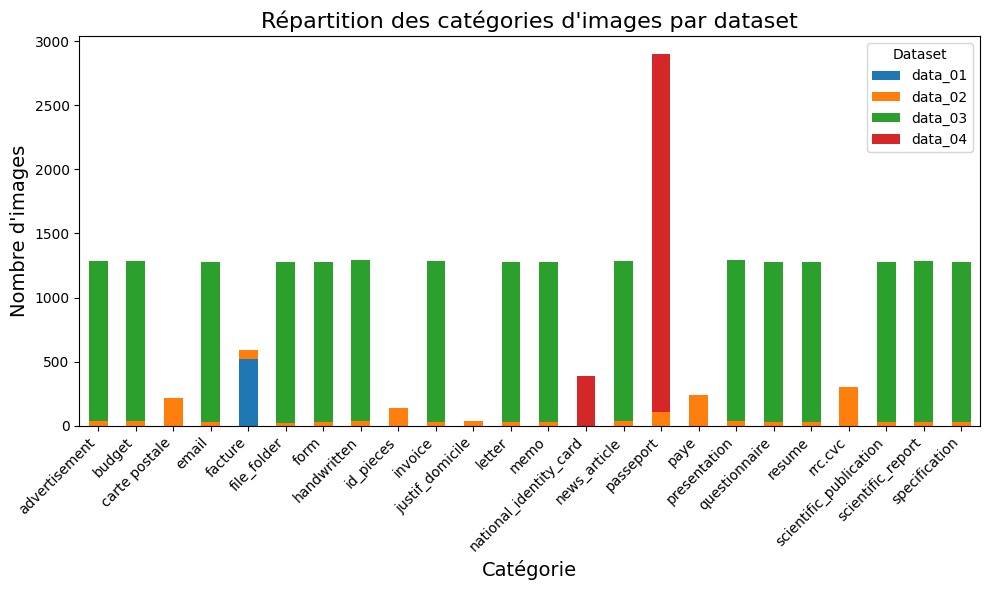

In [8]:
import matplotlib.pyplot as plt

# Grouper les données par catégorie et dataset et compter le nombre d'occurrences
category_counts_by_dataset = image_info.groupby(['label', 'dataset']).size().unstack(fill_value=0)

# Créer un graphique à barres empilées
category_counts_by_dataset.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajouter des titres et des légendes
plt.title('Répartition des catégories d\'images par dataset', fontsize=16)
plt.xlabel('Catégorie', fontsize=14)
plt.ylabel('Nombre d\'images', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.legend(title='Dataset')

# Afficher le graphique
plt.tight_layout()
plt.show()

### VI - QUELQUES STATISTIQUES SUPPLEMENTAIRES

In [9]:
# Calcul des décomptes des catégories par dataset
category_counts_by_dataset = image_info.groupby(['dataset', 'label']).size().unstack(fill_value=0)

# Affichage du tableau
print("Nombre d'images par catégorie et par dataset :\n")
print(category_counts_by_dataset)



Nombre d'images par catégorie et par dataset :

label    advertisement  budget  carte postale  email  facture  file_folder  \
dataset                                                                      
data_01              0       0              0      0      520            0   
data_02             33      33            214     28       73           24   
data_03           1250    1250              0   1250        0         1250   
data_04              0       0              0      0        0            0   

label    form  handwritten  id_pieces  invoice  ...  news_article  passeport  \
dataset                                         ...                            
data_01     0            0          0        0  ...             0          0   
data_02    27           40        138       32  ...            36        104   
data_03  1250         1250          0     1250  ...          1250          0   
data_04     0            0          0        0  ...             0       2794   

la

In [10]:
print("Statistiques sur les données :\n")
print(image_info.describe())

Statistiques sur les données :

             height         width     bluriness
count  25306.000000  25306.000000  25306.000000
mean     926.026713    754.002410   5601.451323
std      263.270744    170.796125   4696.576822
min      133.000000    150.000000     10.572090
25%     1000.000000    754.000000   2311.480311
50%     1000.000000    754.000000   4562.170860
75%     1000.000000    777.000000   7542.555535
max     4455.000000   4700.000000  81949.534005
